1. load the data file train.csv into a data frame
2. build a binary classification model doing all the necessary steps we have discussed
3. output a confusion matrix

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import scikitplot as skplt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [ ]:
from google.colab import files
upload = files.upload()
df = pd.read_csv('bmi.csv')

Saving bmi.csv to bmi (5).csv


In [ ]:
df.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4.0
1,Male,189.0,87.0,2.0
2,Female,185.0,110.0,4.0
3,Female,195.0,104.0,3.0
4,Male,149.0,61.0,3.0


In [ ]:
count_row = df.shape[0]  # Gives number of rows
count_col = df.shape[1]  # Gives number of columns

In [ ]:
count_col

4

In [ ]:
count_row


500

In [ ]:
df.tail()

,Gender,Height,Weight,Index
495,Female,150.0,153.0,5.0
496,Female,184.0,121.0,4.0
497,Female,141.0,136.0,5.0
498,Male,150.0,95.0,5.0
499,Male,173.0,131.0,5.0


In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df.isnull().sum()

Gender    2
Height    2
Weight    2
Index     1
dtype: int64

In [ ]:
#object data type (for storing mixed data like numbers, strings, etc.)
df.dtypes.value_counts()



float64    3
object     1
dtype: int64

In [ ]:
df.dtypes

Gender     object
Height    float64
Weight    float64
Index     float64
dtype: object

In [ ]:
df.describe()
df.head()

,Gender,Height,Weight,Index
0,Male,174.0,96.0,4.0
1,Male,189.0,87.0,2.0
2,Female,185.0,110.0,4.0
3,Female,195.0,104.0,3.0
4,Male,149.0,61.0,3.0


In [ ]:
dataset = df.values
X = dataset[:,0:3]
Y = dataset[:,3]


In [ ]:
X

array([['Male', 174.0, 96.0],
       ['Male', 189.0, 87.0],
       ['Female', 185.0, 110.0],
       ...,
       ['Female', 141.0, 136.0],
       ['Male', 150.0, 95.0],
       ['Male', 173.0, 131.0]], dtype=object)

In [ ]:
Y

array([4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 4.0, 2.0, 4.0, 3.0,
       2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 2.0, 3.0,
       3.0, 1.0, 5.0, 5.0, 5.0, 1.0, 1.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0,
       2.0, 4.0, 5.0, 2.0, 5.0, 4.0, 2.0, 4.0, 4.0, nan, 5.0, 5.0, 1.0,
       5.0, 4.0, 4.0, 3.0, 4.0, 5.0, 3.0, 5.0, 0.0, 5.0, 0.0, 2.0, 5.0,
       5.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 5.0, 2.0, 3.0, 4.0, 4.0, 4.0,
       4.0, 0.0, 3.0, 5.0, 3.0, 4.0, 5.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0,
       3.0, 3.0, 2.0, 4.0, 5.0, 4.0, 5.0, 1.0, 0.0, 4.0, 5.0, 5.0, 4.0,
       4.0, 4.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 2.0,
       5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 2.0,
       5.0, 2.0, 5.0, 4.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 2.0, 4.0, 5.0,
       5.0, 5.0, 4.0, 3.0, 5.0, 3.0, 3.0, 0.0, 3.0, 3.0, 5.0, 5.0, 4.0,
       3.0, 5.0, 3.0, 4.0, 2.0, 2.0, 3.0, 5.0, 4.0, 2.0, 4.0, 5.0, 3.0,
       2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 3.0, 5.0, 3.0, 3.

In [ ]:
df = df.dropna()

In [ ]:
print(df.head(10))


   Gender  Height  Weight  Index
0    Male   174.0    96.0    4.0
1    Male   189.0    87.0    2.0
2  Female   185.0   110.0    4.0
3  Female   195.0   104.0    3.0
4    Male   149.0    61.0    3.0
5    Male   189.0   104.0    3.0
6    Male   147.0    92.0    5.0
7    Male   154.0   111.0    5.0
8    Male   174.0    90.0    3.0
9  Female   169.0   103.0    4.0


In [ ]:
print(df.shape)

(494, 4)


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
label = le.fit_transform(df['Gender'])

In [ ]:
label


array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,

In [ ]:
df.drop("Gender", axis=1, inplace=True)

In [ ]:
df["Gender"] = label

In [ ]:
df

,Height,Weight,Index,Gender
0,174.0,96.0,4.0,1
1,189.0,87.0,2.0,1
2,185.0,110.0,4.0,0
3,195.0,104.0,3.0,0
4,149.0,61.0,3.0,1
5,189.0,104.0,3.0,1
6,147.0,92.0,5.0,1
7,154.0,111.0,5.0,1
8,174.0,90.0,3.0,1
9,169.0,103.0,4.0,0


In [ ]:
df.head()

,Height,Weight,Index,Gender
0,174.0,96.0,4.0,1
1,189.0,87.0,2.0,1
2,185.0,110.0,4.0,0
3,195.0,104.0,3.0,0
4,149.0,61.0,3.0,1


In [ ]:
df.dtypes

Height    float64
Weight    float64
Index     float64
Gender      int64
dtype: object

In [ ]:
X1 = dataset[:,0:3]
Y1 = dataset[:,3]

In [ ]:
X1

array([['Male', 174.0, 96.0],
       ['Male', 189.0, 87.0],
       ['Female', 185.0, 110.0],
       ...,
       ['Female', 141.0, 136.0],
       ['Male', 150.0, 95.0],
       ['Male', 173.0, 131.0]], dtype=object)

In [ ]:
Y1

array([4.0, 2.0, 4.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 4.0, 2.0, 4.0, 3.0,
       2.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 4.0, 5.0, 2.0, 3.0,
       3.0, 1.0, 5.0, 5.0, 5.0, 1.0, 1.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0,
       2.0, 4.0, 5.0, 2.0, 5.0, 4.0, 2.0, 4.0, 4.0, nan, 5.0, 5.0, 1.0,
       5.0, 4.0, 4.0, 3.0, 4.0, 5.0, 3.0, 5.0, 0.0, 5.0, 0.0, 2.0, 5.0,
       5.0, 4.0, 2.0, 4.0, 4.0, 2.0, 4.0, 5.0, 2.0, 3.0, 4.0, 4.0, 4.0,
       4.0, 0.0, 3.0, 5.0, 3.0, 4.0, 5.0, 0.0, 5.0, 5.0, 5.0, 5.0, 5.0,
       3.0, 3.0, 2.0, 4.0, 5.0, 4.0, 5.0, 1.0, 0.0, 4.0, 5.0, 5.0, 4.0,
       4.0, 4.0, 5.0, 5.0, 4.0, 3.0, 4.0, 5.0, 4.0, 2.0, 4.0, 3.0, 2.0,
       5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 5.0, 2.0,
       5.0, 2.0, 5.0, 4.0, 5.0, 5.0, 5.0, 3.0, 5.0, 5.0, 2.0, 4.0, 5.0,
       5.0, 5.0, 4.0, 3.0, 5.0, 3.0, 3.0, 0.0, 3.0, 3.0, 5.0, 5.0, 4.0,
       3.0, 5.0, 3.0, 4.0, 2.0, 2.0, 3.0, 5.0, 4.0, 2.0, 4.0, 5.0, 3.0,
       2.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 3.0, 5.0, 3.0, 3.

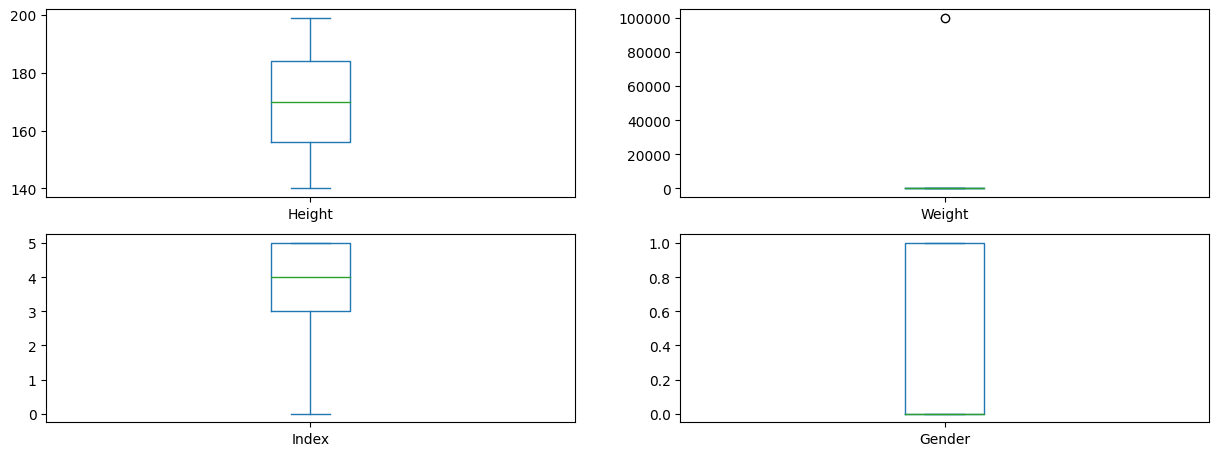

In [ ]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

In [ ]:
df = df.drop(64) #this row has an outlier in the weight column

In [ ]:
print(df.shape)

(493, 4)


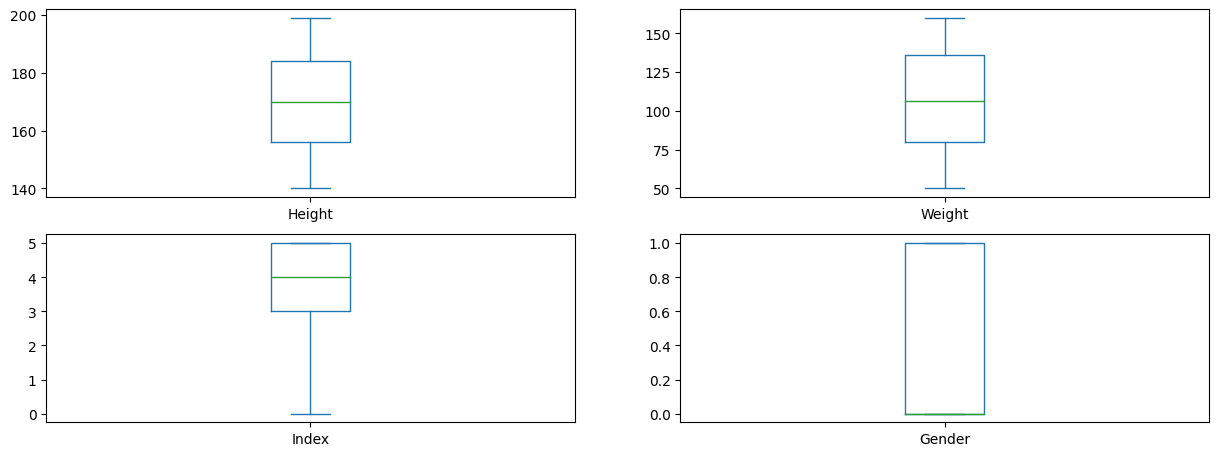

In [ ]:
df.plot(kind="box",subplots=True,layout=(7,2),figsize=(15,20));

array([[<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>],
       [<Axes: title={'center': 'Index'}>,
        <Axes: title={'center': 'Gender'}>]], dtype=object)

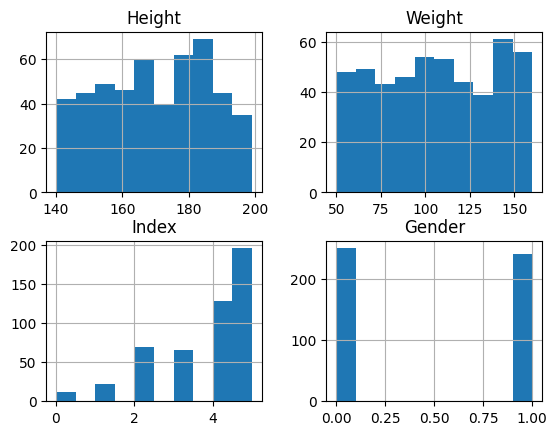

In [ ]:
df.hist()

In [ ]:
corr_matrix = df.select_dtypes(include=np.number).corrwith(df['Index']).sort_values(ascending=False)
corr_matrix

Index     1.000000
Weight    0.804609
Gender    0.023712
Height   -0.420991
dtype: float64

<Axes: >

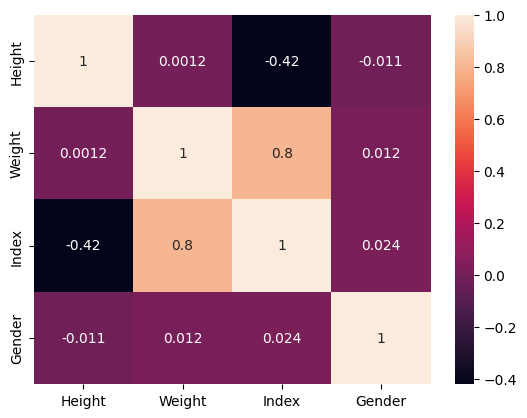

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
# c) Split the dataset into train and test sets
X = df.drop(columns=['Index'], axis = 1)
y = df['Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
# Standardize the dataset by rescaling the distribution of values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# convert the array back to a dataframe
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(369, 3) (124, 3)
(369,) (124,)


In [ ]:
# Check the dimension of the sets
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))

X_train: (369, 3)
y_train: (369,)
X_test: (124, 3)
y_test: (124,)


In [ ]:
train_cols = df.columns[~df.columns.isin(['Index'])]
train_cols

Index(['Height', 'Weight', 'Gender'], dtype='object')

In [ ]:
df['Index'].value_counts()


5.0    196
4.0    128
2.0     69
3.0     66
1.0     22
0.0     12
Name: Index, dtype: int64

In [ ]:
len(train_cols)

3

In [ ]:
# define baseline model
def baseline_model():
 # create model
 model = Sequential()
 model.add(Dense(6, input_dim=3, activation='relu'))
 model.add(Dense(6, activation='softmax'))
 # Compile model
 model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
 return model

In [ ]:
estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)

<ipython-input-63-bf22d4220b38>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  estimator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5, verbose=0)


In [ ]:
kfold = KFold(n_splits=10, shuffle=True)

In [ ]:

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(6, activation='relu', input_shape=(X.shape[1],)))
    #model.add(layers.Dropout(rate=.3))
    model.add(layers.Dense(6, activation='softmax'))

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[tf.metrics.Recall(), 'accuracy'])
    return model
model = build_model()
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 6)                 24        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=8, verbose=1)
#callbacks = [EarlyStopping(monitor='loss', patience=1,restore_best_weights=True)]
modelfit = model.fit(X, y)

Epoch 1/50


<ipython-input-66-8fdf503cb11a>:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=50, batch_size=8, verbose=1)


62/62 [==============================] - 1s 2ms/step - loss: 42.3762 - recall_6: 0.2312 - accuracy: 0.2312
Epoch 2/50
62/62 [==============================] - 0s 2ms/step - loss: 21.8939 - recall_6: 0.2617 - accuracy: 0.2698
Epoch 3/50
62/62 [==============================] - 0s 2ms/step - loss: 14.9225 - recall_6: 0.2677 - accuracy: 0.3306
Epoch 4/50
62/62 [==============================] - 0s 2ms/step - loss: 11.7400 - recall_6: 0.2170 - accuracy: 0.2901
Epoch 5/50
62/62 [==============================] - 0s 2ms/step - loss: 9.8222 - recall_6: 0.1968 - accuracy: 0.2840
Epoch 6/50
62/62 [==============================] - 0s 2ms/step - loss: 8.9008 - recall_6: 0.1927 - accuracy: 0.3103
Epoch 7/50
62/62 [==============================] - 0s 2ms/step - loss: 8.0582 - recall_6: 0.1318 - accuracy: 0.3245
Epoch 8/50
62/62 [==============================] - 0s 3ms/step - loss: 7.2669 - recall_6: 0.1481 - accuracy: 0.3103
Epoch 9/50
62/62 [==============================] - 0s 3ms/step - loss:

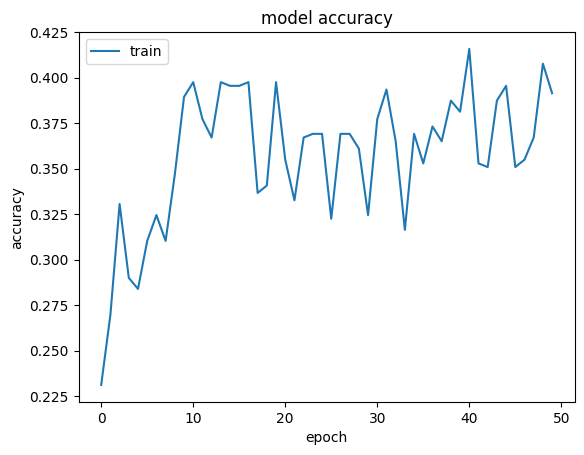

In [ ]:
plt.plot(modelfit.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

4/4 [==============================] - 1s 3ms/step
prediction 0.0
4/4 [==============================] - 0s 5ms/step
prediction_prob [0.2957522  0.20988454 0.20385292 0.12671672 0.07212339 0.09167017]
16/16 [==============================] - 1s 3ms/step - loss: 2.2365 - recall_6: 0.0000e+00 - accuracy: 0.0403
0.04032257944345474


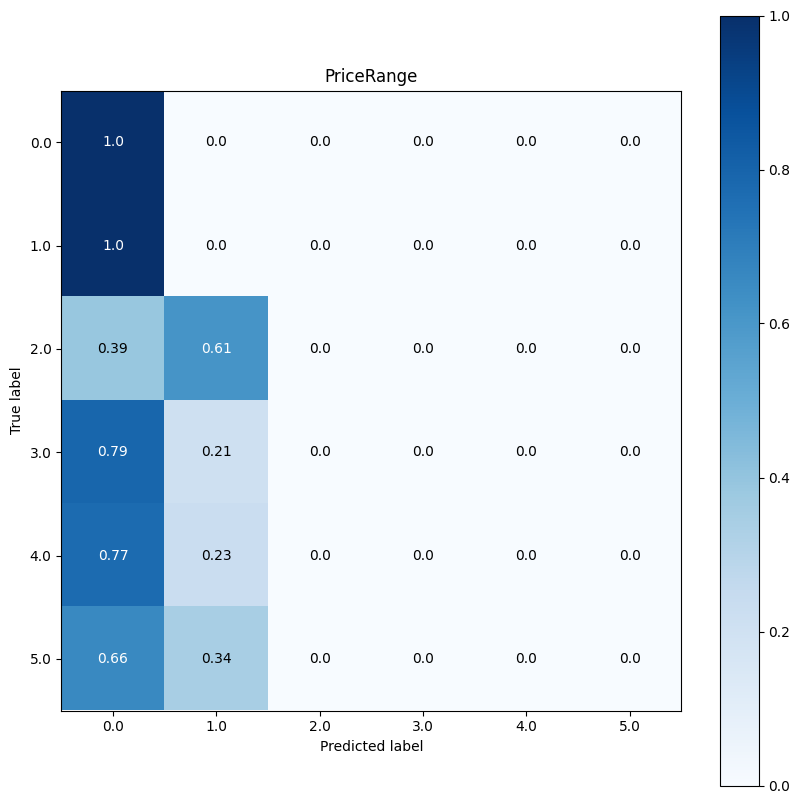

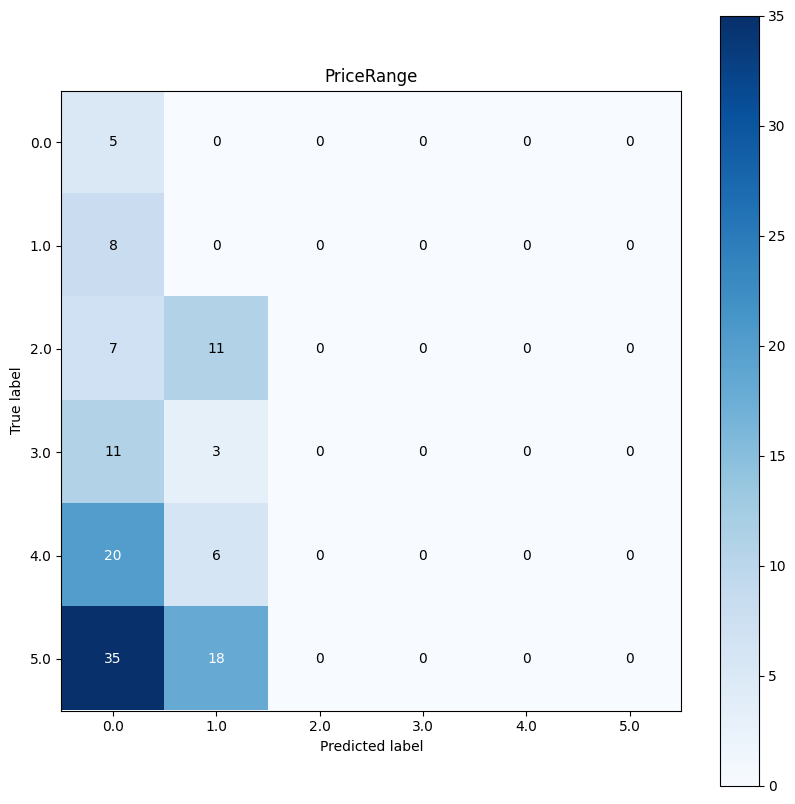

0.04032258064516129
0.009689922480620155
0.16666666666666666
0.018315018315018312


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.
  warnings.warn(msg, category=FutureWarning)


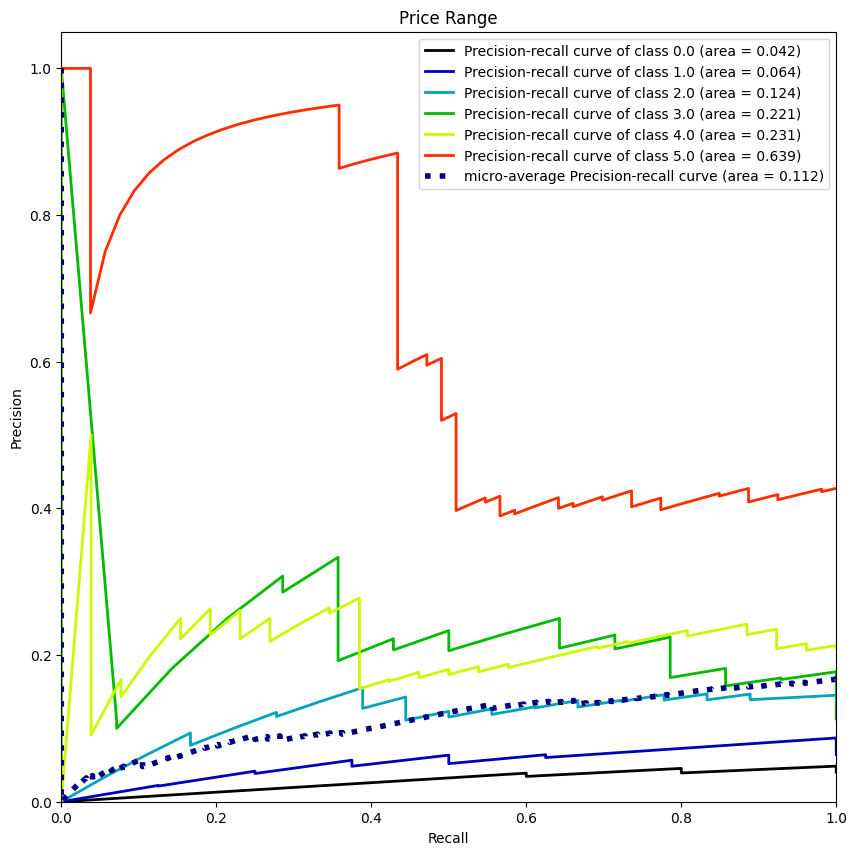

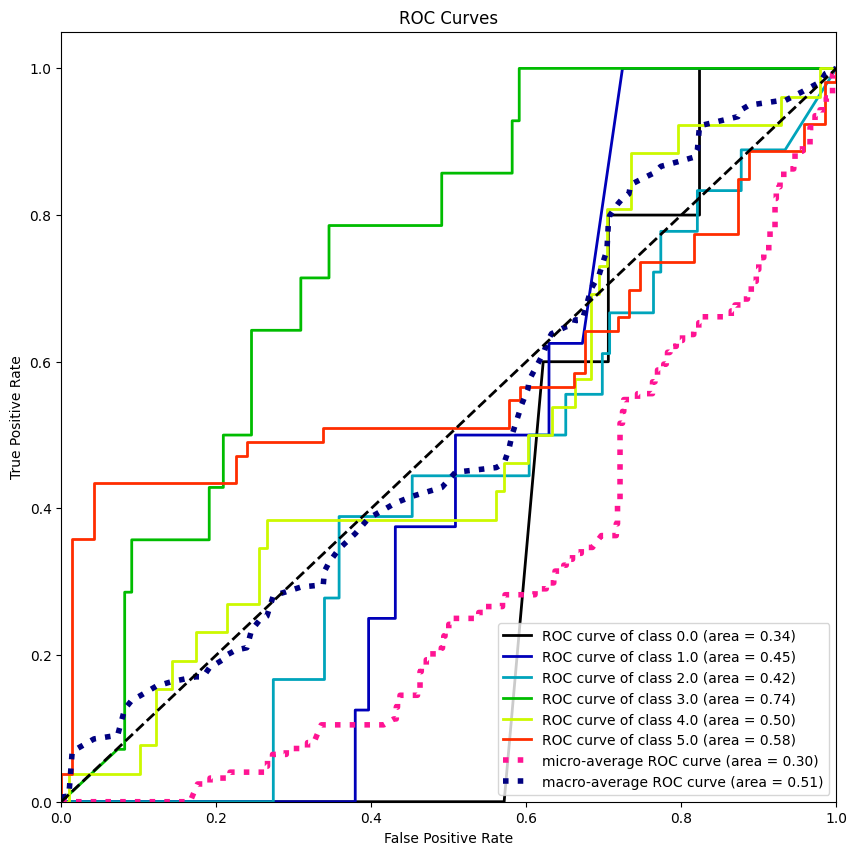

In [ ]:
import scikitplot as skplt
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
plt.rcParams['figure.figsize'] = [10, 10]

pre = model.predict(X_test)
print("prediction", pre[0])
predictions = model.predict_proba(X_test)
print("prediction_prob", predictions[0])
print(model.score(X_test, y_test))

skplt.metrics.plot_confusion_matrix(y_test, pre, normalize=True,title='PriceRange')
plt.show()
skplt.metrics.plot_confusion_matrix(y_test, pre, normalize=False,title='PriceRange')
plt.show()
#skplt.metrics.plot_roc(y_test, predictions)
#plt.show()

print(accuracy_score(y_test, pre))
print(precision_score(y_test, pre, average='macro'))
print(recall_score(y_test, pre,average='macro'))
print(f1_score(y_test, pre,average='macro'))

skplt.metrics.plot_precision_recall_curve(y_test,  predictions,title='Price Range')

skplt.metrics.plot_roc(y_test,predictions)
plt.show()